# Project:Titanic - Machine Learning from Disaster
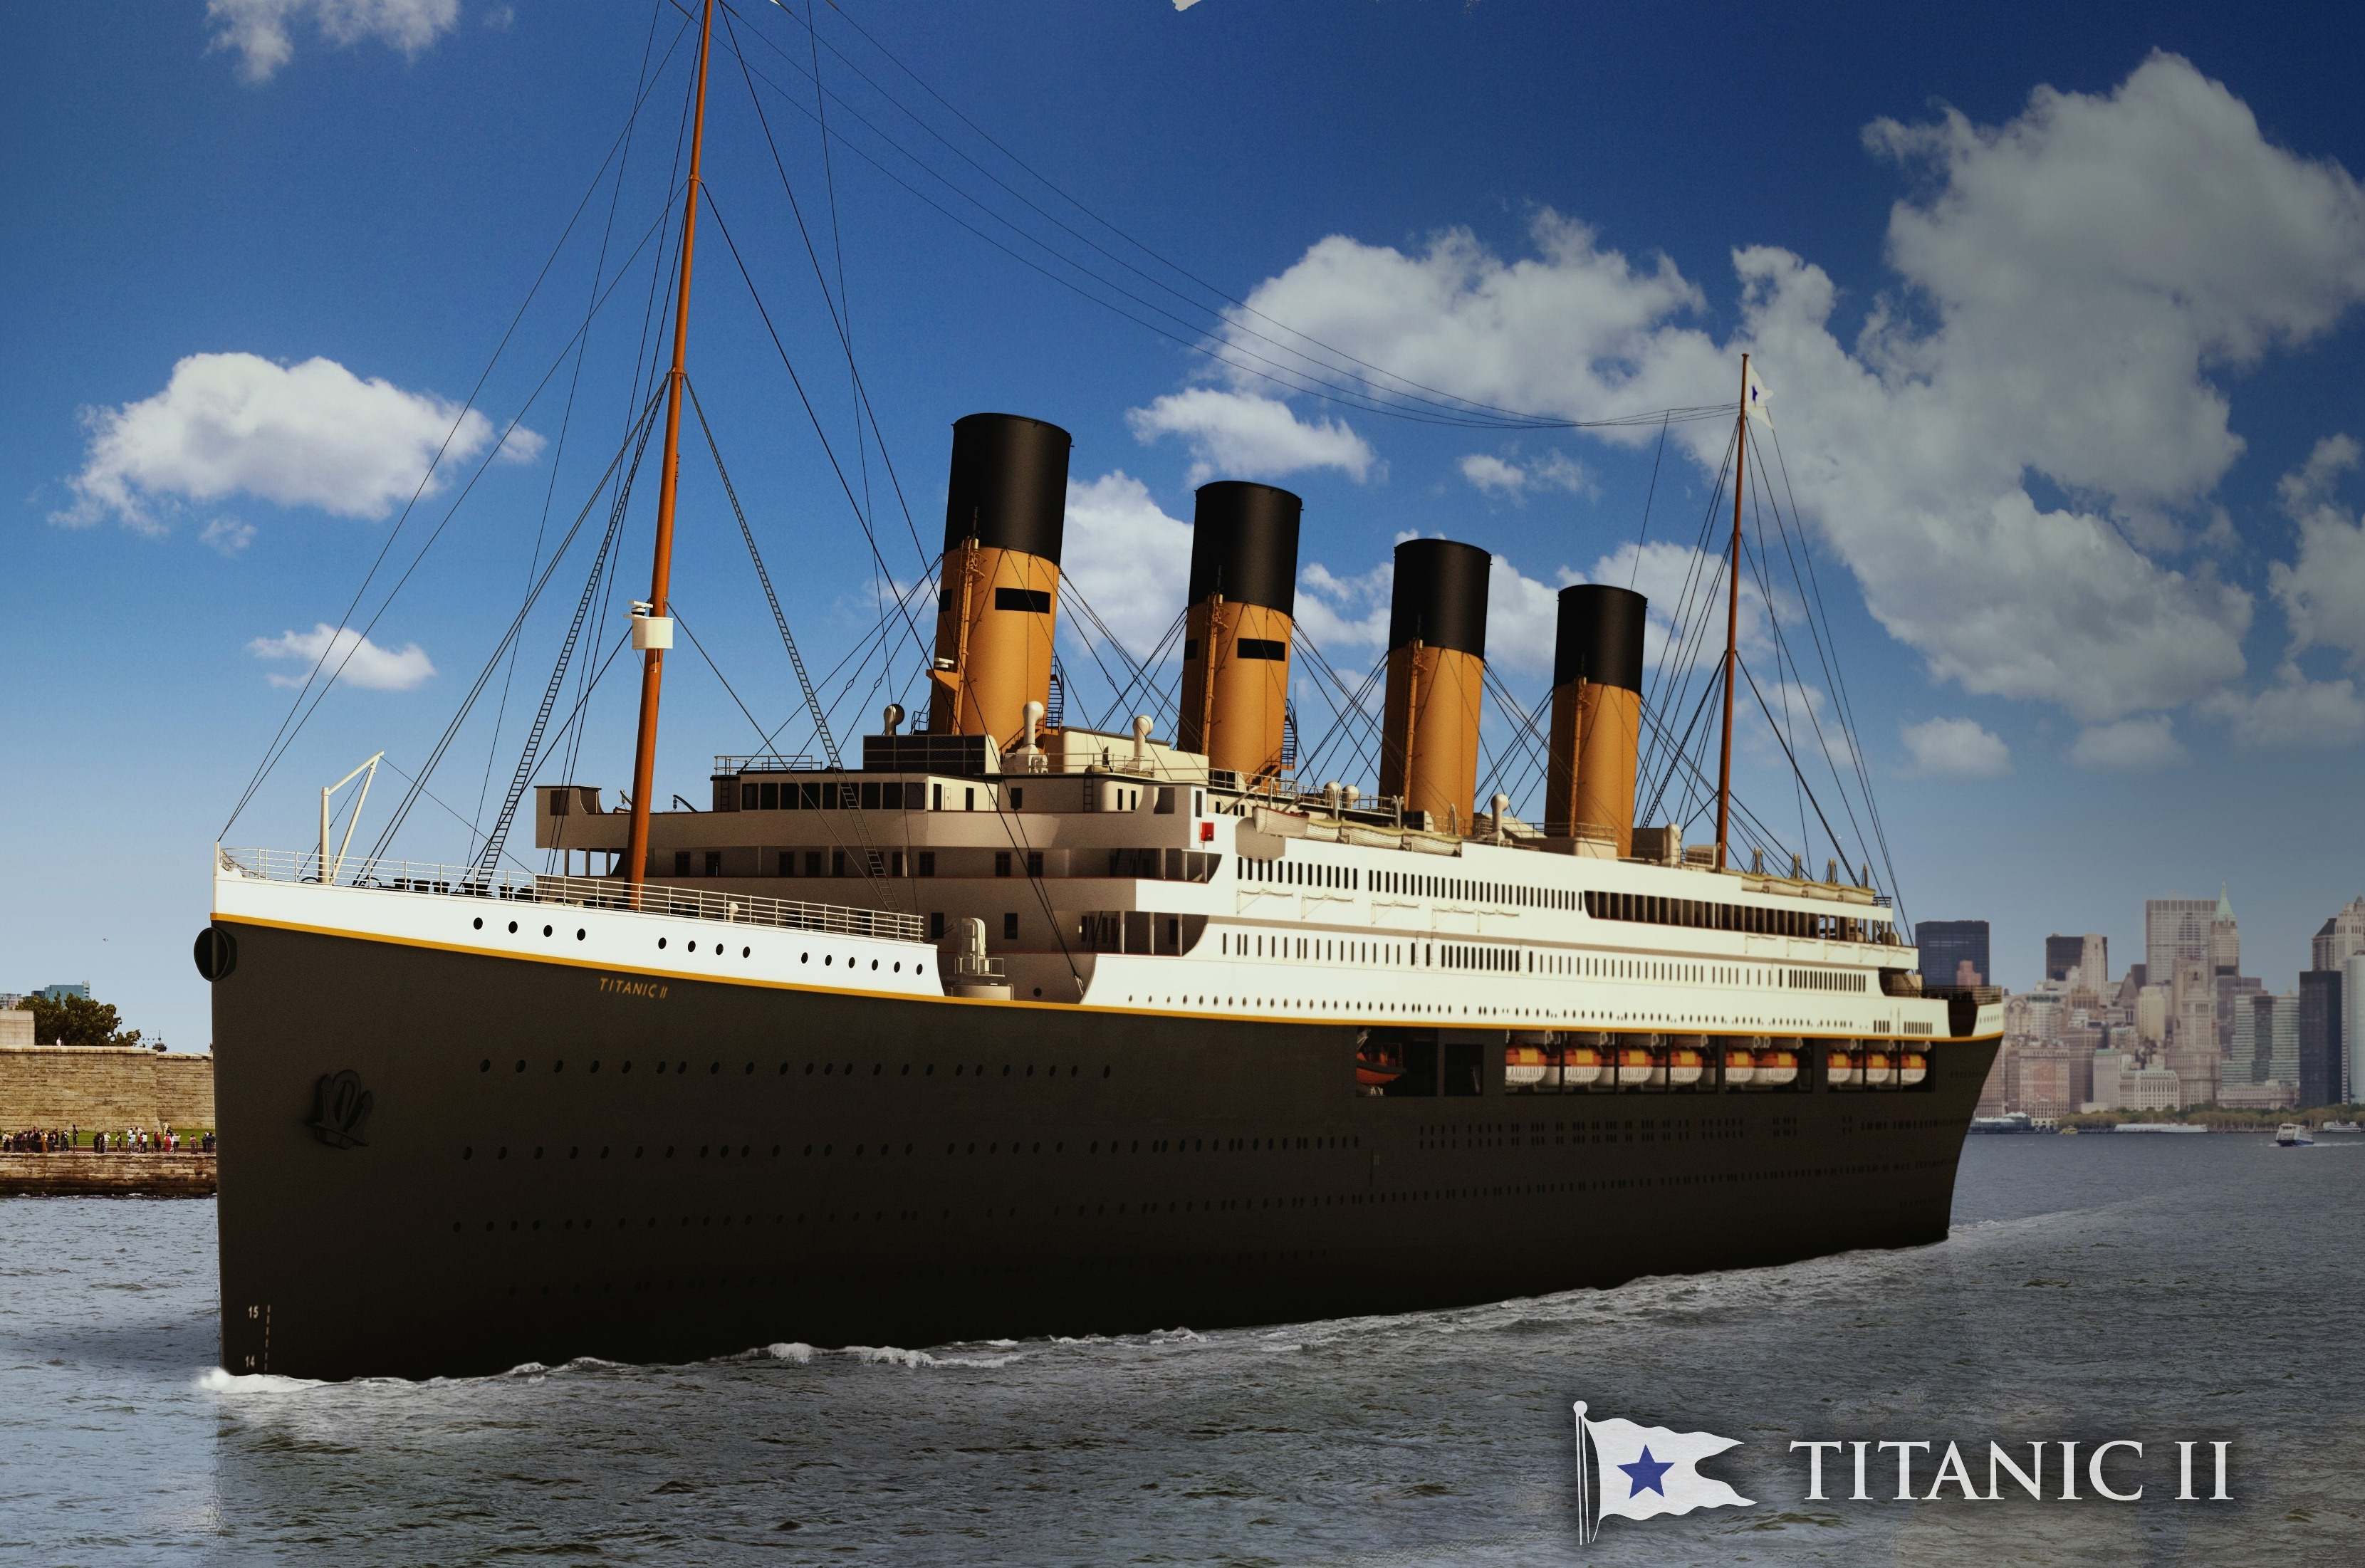

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [132]:
train_df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [134]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
 train_df['Survived'] = train_df['Survived'].astype('category')

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [140]:
features = ["Pclass", "Sex", "SibSp", "Embarked"]
def convert_toCategory (df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_toCategory(train_df, features)
convert_toCategory(test_df, features)

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 54.0+ KB


In [142]:
train_df.describe()

,PassengerId,Age,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,0.381594,32.204208
std,257.353842,14.526497,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,14.454200
75%,668.500000,38.000000,0.000000,31.000000
max,891.000000,80.000000,6.000000,512.329200


In [143]:
 train_df['Parch'] = train_df['Parch'].astype('category')

In [144]:
train_df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [145]:
train_df.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


##EDA

In [146]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [147]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


###Sex

##


### sex


## 'Sex'

### `Sex`

In [148]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot:xlabel='Sex', ylabel='count'>

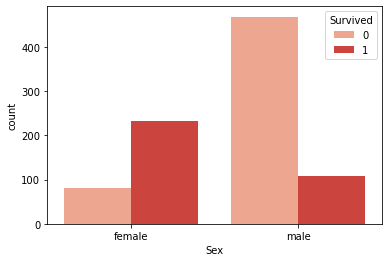

In [149]:
sns.countplot(data = train_df, x = 'Sex', hue = "Survived", palette = "Reds")

- remanining categorical feature colums

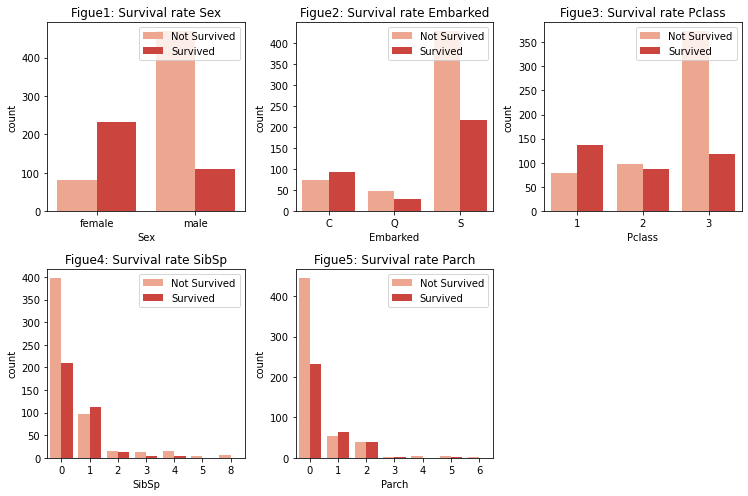

In [150]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3 
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range (0, n_rows):
    for c in range (0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i] , hue = "Survived", palette = "Reds", ax=ax_i)
            ax_i.set_title(f"Figue{i+1}: Survival rate {cols[i]}")
            ax_i.legend(title = '', loc = 'upper right', 
                        labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout() 
plt.show()

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

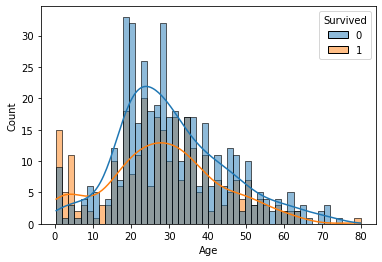

In [151]:
sns.histplot(data = train_df, x = 'Age',hue = 'Survived', bins = 50, kde = True)

In [152]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

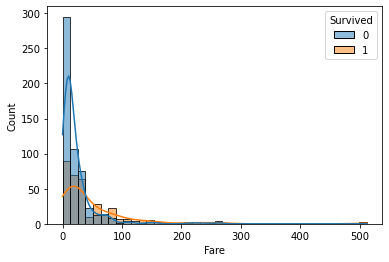

In [153]:
sns.histplot(data = train_df, x = 'Fare',hue = 'Survived', bins = 40, kde = True)

In [154]:
pd.qcut(train_df['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

<AxesSubplot:xlabel='Fare', ylabel='count'>

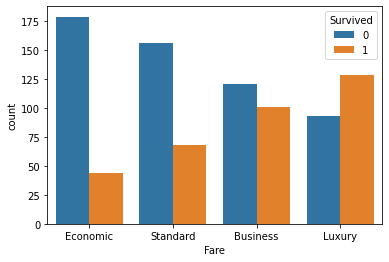

In [155]:
fare_categories = ['Economic','Standard','Business','Luxury']
quartile_fare = pd.qcut(train_df['Fare'], 4,labels = fare_categories)
sns.countplot(x = quartile_fare ,hue =train_df['Survived'])


In [156]:
features = ['Sex', 'Pclass', 'SibSp', 'Embarked']
y = train_df['Survived']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])
X_test.head()


,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [168]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)  
prediction = model.predict(X_test)  
display = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':prediction})

In [170]:
display.to_csv("./Data/predict.csv")

In [174]:
display.head()

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
